In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# Problem 1
ml-03の講義資料や演習の内容を参考にしました。

## 問題の前準備

In [2]:
# Dataset IV
n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
x = x.astype(np.longdouble)
y = (2 * x[:, 0] - 1 * x[:, 1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y = 2 * y.astype(int) - 1

In [3]:
# 最初の5県を表示
print(x[:5])
print(y[:5])

[[-0.45140533 -0.03822334  0.32568701 -1.17685699]
 [-0.86825012 -0.69865533 -0.24066641  0.3063617 ]
 [ 0.27829867  1.0342547  -0.19773114  0.30420609]
 [ 1.11212242 -0.5703202   0.38360959 -0.10952217]
 [ 1.2645793   0.59793586 -0.34053928 -1.17801878]]
[-1 -1 -1  1  1]


In [4]:
# xを4*5行列に変換して、最初の行は1にする
x = np.hstack([np.ones((n, 1)), x])
print(x[:5])

[[ 1.         -0.45140533 -0.03822334  0.32568701 -1.17685699]
 [ 1.         -0.86825012 -0.69865533 -0.24066641  0.3063617 ]
 [ 1.          0.27829867  1.0342547  -0.19773114  0.30420609]
 [ 1.          1.11212242 -0.5703202   0.38360959 -0.10952217]
 [ 1.          1.2645793   0.59793586 -0.34053928 -1.17801878]]


In [5]:
# 諸々の関数の定義
def sigmoid(x):
    if x >= 0:
        return 1 / (1 + np.exp(-x))
    else:
        return np.exp(x) / (1 + np.exp(x))

def J(w, x, y, lam):
    answer = 0
    for x_i, y_i in zip(x, y):
        answer += np.log(1 + np.exp(-y_i * np.dot(w, x_i)))
    answer += lam / 2 * np.dot(w, w)
    return answer

def grad_J(w, x, y, lam):
    answer = np.zeros(len(w))
    for x_i, y_i in zip(x, y):
        # sigmoid関数の中身を-にしているのがポイント
        answer += -y_i * x_i * sigmoid(-y_i * np.dot(w, x_i))
    answer += lam * w
    return answer

def hess_J(w, x, y, lam):
    answer = np.zeros((len(w), len(w)))
    for x_i, y_i in zip(x, y):
        answer += np.outer(x_i, x_i) * sigmoid(-y_i * np.dot(w, x_i)) * sigmoid(y_i * np.dot(w, x_i))
    answer += lam * np.eye(len(w))
    return answer

## Batch steepest gradient method と Newton method の比較

In [6]:
def gradient_method(w_init, x, y, lam, eta, num_iter):
    w = w_init.copy()
    J_values = []
    for i in range(num_iter):
        w -= eta * grad_J(w, x, y, lam)
        J_values.append(J(w, x, y, lam))
    return w, J_values

def newton_method(w_init, x, y, lam, num_iter):
    w = w_init.copy()
    J_values = []
    for i in range(num_iter):
        w -= np.linalg.solve(hess_J(w, x, y, lam), grad_J(w, x, y, lam))
        J_values.append(J(w, x, y, lam))
    return w, J_values

# パラメータの初期値
w_init = np.random.rand(5)
lam = 0.1
eta = 0.1
num_iter = 100

# 勾配法でw_hatを求める。
w_hat, _ = gradient_method(w_init, x, y, lam, eta, num_iter)

In [7]:
# w_hatを使って、勾配法のJ(w)とJ(w_hat)の絶対値の差を計算する
num_iter = 100
_, gradinet_J_values = gradient_method(w_init, x, y, lam, eta, num_iter)

gradinet_J_diff = [np.abs(J_value - J(w_hat, x, y, lam)) for J_value in gradinet_J_values]
print(gradinet_J_diff)

[23.736780854654096, 0.9355655650055077, 0.3661921585285164, 0.29245551521258406, 0.2559394697089665, 0.22638356726032427, 0.2007286262710224, 0.17824106151314822, 0.15847192879023808, 0.14105712122809422, 0.12568874071842373, 0.11210409285488154, 0.10007804438565415, 0.08941695525110305, 0.07995373273775996, 0.0715437620410917, 0.06406153750182852, 0.0573978593170672, 0.05145748970502595, 0.04615718455244533, 0.041424033563668416, 0.03719405514661034, 0.033411002627953934, 0.030025346560936583, 0.02699340437554909, 0.02427659379887359, 0.021840790630246687, 0.019655774810257043, 0.017694751442473233, 0.015933935642184593, 0.014352191900542266, 0.012930720141358876, 0.011652781878606078, 0.010503460899904837, 0.00946945374875341, 0.008538885984005873, 0.007701150786630251, 0.006946766980451713, 0.006267253951698137, 0.005655021305503993, 0.005103271397231879, 0.004605913130820483, 0.0041574856329873455, 0.0037530905970903916, 0.0033883322493615253, 0.0030592640257189885, 0.002762341164

In [8]:
# w_hatを使って、勾配法のJ(w)とJ(w_hat)の差を計算する
num_iter = 100
_, newton_J_values = newton_method(w_init, x, y, lam, num_iter)

newton_J_diff = [np.abs(J_value - J(w_hat, x, y, lam)) for J_value in newton_J_values]
print(newton_J_diff)

[28.71103736501284, 10.041495519048635, 2.704725161840642, 0.3337644258174244, 0.0077119016392188655, 8.385075890515736e-06, 1.37147726846365e-05, 1.371477549483302e-05, 1.3714775487727593e-05, 1.3714775487727593e-05, 1.3714775491280307e-05, 1.371477548417488e-05, 1.3714775491280307e-05, 1.3714775487727593e-05, 1.3714775487727593e-05, 1.3714775491280307e-05, 1.3714775487727593e-05, 1.3714775491280307e-05, 1.371477548417488e-05, 1.3714775491280307e-05, 1.3714775487727593e-05, 1.3714775487727593e-05, 1.3714775491280307e-05, 1.3714775487727593e-05, 1.3714775491280307e-05, 1.371477548417488e-05, 1.3714775491280307e-05, 1.3714775487727593e-05, 1.3714775487727593e-05, 1.3714775491280307e-05, 1.3714775487727593e-05, 1.3714775491280307e-05, 1.371477548417488e-05, 1.3714775491280307e-05, 1.3714775487727593e-05, 1.3714775487727593e-05, 1.3714775491280307e-05, 1.3714775487727593e-05, 1.3714775491280307e-05, 1.371477548417488e-05, 1.3714775491280307e-05, 1.3714775487727593e-05, 1.3714775487727593e

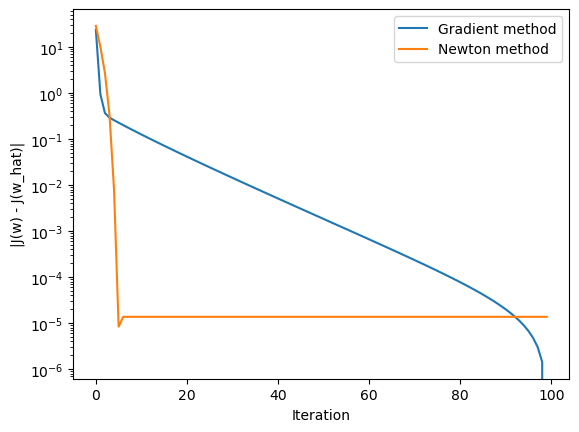

In [9]:
# 片対数グラフで表示
plt.plot(range(num_iter), gradinet_J_diff, label='Gradient method')
plt.plot(range(num_iter), newton_J_diff, label='Newton method')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('|J(w) - J(w_hat)|')
plt.legend()
plt.show()

Newton方のほうが答えに早くたどり着くことができる。

# Problem 2

## 1.

In [3]:
A = np.array(
    [[3, 0.5],
     [0.5, 1]]
)
mu = np.array([1, 2])
lam_list = np.arange(0, 10, 0.01) + 0.01

In [4]:
lam_list

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
        0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
        0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
        0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99,
        1.  ,  1.01,  1.02,  1.03,  1.04,  1.05,  1.06,  1.07,  1.08,
        1.09,  1.1 ,  1.11,  1.12,  1.13,  1.14,  1.15,  1.16,  1.17,
        1.18,  1.19,  1.2 ,  1.21,  1.22,  1.23,  1.24,  1.25,  1.26,
        1.27,  1.28,

In [34]:
# 学習率の定義
eta = 1 / np.max(np.linalg.eigvals(A))
# 重みの初期値の定義
w_init = np.zeros_like(mu)
# イテレーション回数の定義
num_iter = 100

In [37]:
def J(w, A, mu, lam):
    return 0.5 * (w - mu) @ A @ (w - mu) + lam * np.linalg.norm(w, 1)

def prox_l1(v, lam, eta):
    return np.sign(v) * np.maximum(0, np.abs(v) - lam * eta)

def proximal_gradient_method(A, mu, lam, eta, num_iter):
    w = np.zeros_like(mu)
    obj_vals = []
    for t in range(num_iter):
        grad = A @ (w - mu)
        w = prox_l1(w - eta * grad, lam, eta)
        obj_val = J(w, A, mu, lam)
        obj_vals.append(obj_val)
    return w, obj_vals

まず|J(w(t)) - J(ŵ)|の対数グラフをプロットする。このときlam=0.01に固定する。

In [38]:
lam = 0.1

# 近接勾配法でw_hatを求めて、J(w_hat)の値を計算する
w_hat, obj_vals = proximal_gradient_method(A, mu, lam, eta, num_iter)
J_w_hat = J(w_hat, A, mu, 0.1)

# cvxoptを使って、ラッソ回帰を解く
# cvxopt を使ってラッソ回帰を解く
P = matrix(A)
q = matrix(-A @ mu)
G = matrix(np.vstack([-np.eye(2), np.eye(2)]))
h = matrix(np.hstack([np.zeros(len(mu)), lam * np.ones(len(mu))]))

sol = solvers.qp(P, q, G, h)
w_hat_cvxopt = np.array(sol['x']).flatten()

# 結果の表示
print(w_hat)
print(w_hat_cvxopt)


     pcost       dcost       gap    pres   dres
 0: -3.4524e+00 -1.8646e+00  1e+01  3e+00  2e-16
 1: -1.6046e+00 -8.7790e-01  1e+00  4e-01  3e-16
 2: -6.0921e-01 -7.3071e-01  1e-01  7e-17  5e-15
 3: -6.2432e-01 -6.2633e-01  2e-03  2e-17  0e+00
 4: -6.2499e-01 -6.2501e-01  2e-05  2e-17  1e-16
 5: -6.2500e-01 -6.2500e-01  2e-07  3e-17  2e-16
Optimal solution found.
[0.98181818 1.90909091]
[0.1        0.09999998]


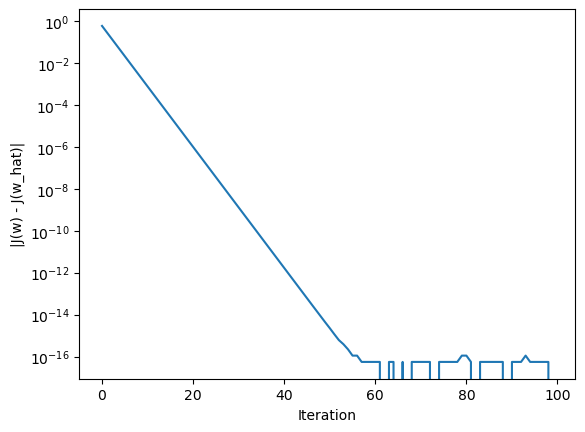

In [39]:
# J(w_hat)とJ(w(t))の差を計算する
obj_diff = [np.abs(J_value - J_w_hat) for J_value in obj_vals]
# グラフの描画
plt.plot(range(num_iter), obj_diff)
plt.xlabel('Iteration')
plt.ylabel('|J(w) - J(w_hat)|')
plt.yscale('log')
plt.show()

次にlambdaを変化させて、w_hatがどのように変化するのかをプロットする。

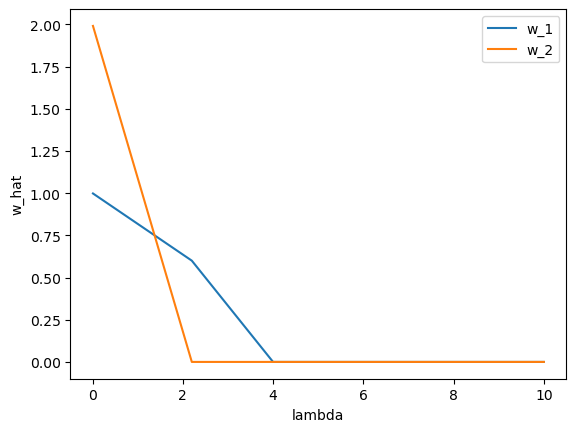

In [41]:
w_hat_list = []
for lam in lam_list:
    w_hat, _ = proximal_gradient_method(A, mu, lam, eta, num_iter)
    w_hat_list.append(w_hat)

plt.plot(lam_list, w_hat_list)
plt.xlabel('lambda')
plt.ylabel('w_hat')
plt.legend(['w_1', 'w_2'])

## 2.

In [42]:
A_dash = np.array(
    [[300, 0.5],
     [0.5, 10]]
)

In [64]:
lam = 0.1
eta = 1 / np.max(np.linalg.eigvals(A_dash))
num_iter = 50
# 近接勾配法でw_hatを求めて、J(w_hat)の値を計算する
PG_w_hat, PG_obj_vals = proximal_gradient_method(A_dash, mu, lam, eta, num_iter)

# 結果の表示
print(PG_w_hat)

[1.00031275 1.62494025]


In [71]:
# AdaGradの実装
def adagrad(A, mu, lam, eta_init, epsilon, num_iter=1000):
    w = np.zeros_like(mu, dtype=np.float64)
    G = np.zeros_like(mu, dtype=np.float64)
    obj_vals = []
    
    for t in range(num_iter):
        grad = A @ (w - mu)
        G += grad ** 2
        eta_t = eta_init / (np.sqrt(G) + epsilon)
        w = prox_l1(w - eta_t * grad, lam, eta_t)
        obj_val = J(w, A, mu, lam)
        obj_vals.append(obj_val)
    
    return w, obj_vals

In [72]:
# AdaGradでw_hatを求める
lam = 0.1
eta_init = 1
epsilon = 1e-8
num_iter = 50
AdaGrad_w_hat, AdaGrad_obj_vals = adagrad(A_dash, mu, lam, eta_init, epsilon, num_iter)

# 結果の表示
print(AdaGrad_w_hat)

[0.99968331 1.99001583]


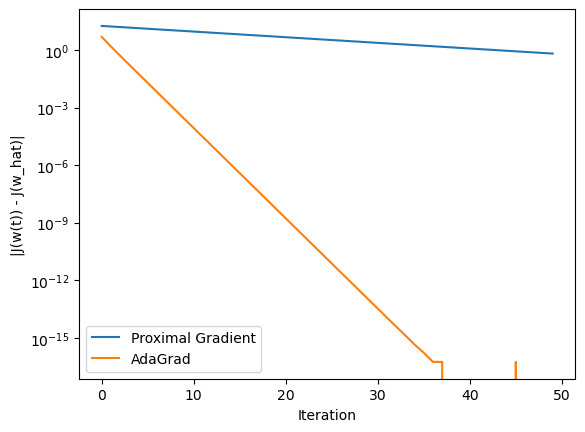

In [78]:
# 今回w_hatはAdaGradのnum_iter=100の時の値を使う
w_hat, _ = adagrad(A_dash, mu, lam, eta_init, epsilon, 100)

# J(w_hat)とJ(w(t))の差を計算する
PG_obj_diff = [np.abs(J_value - J(w_hat, A_dash, mu, lam)) for J_value in PG_obj_vals]
AdaGrad_obj_diff = [np.abs(J_value - J(w_hat, A_dash, mu, lam)) for J_value in AdaGrad_obj_vals]

# グラフの描画
plt.plot(range(num_iter), PG_obj_diff, label='Proximal Gradient')
plt.plot(range(num_iter), AdaGrad_obj_diff, label='AdaGrad')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('|J(w(t)) - J(w_hat)|')
plt.legend()
plt.show()